# CAPSTONE PROJECT 2: Energy Consumption in Commercial Buildings

# About the source of the data:
CBECS is a complex sample survey that produces the only national-level data on the characteristics and energy use in commercial buildings in the United States.The survey was first conducted in 1979 and was then conducted triennially between 1983 and 1995. The sample size for CBECS has historically ranged from 5,000 to 7,000 buildings. The target 2012 CBECS sample size was increased to improve precision and support broader uses of the data; the final responding sample for the 2012 CBECS was 6,720 buildings.

# Data Sets Loading

In [891]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


%matplotlib inline
sns.set(style='whitegrid',context='notebook',font_scale=1.2)

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


#data file 
data = pd.read_csv('/Users/emrahceyhan/Desktop/SpringBoardArchieve/2012_public_use_data_aug2016.csv')

In [892]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [893]:
#layout file describing all columns
layout = pd.read_csv('/Users/emrahceyhan/Desktop/SpringBoardArchieve/2012microdata_codebook.csv')
layout.head()

,File order,Variable name,Variable type,Len- gth,Format,Label,Values/Format codes,Unnamed: 7
0,1.0,PUBID,Char,5.0,NaN,Building identifier,00001 - 06720,NaN
1,2.0,REGION,Char,1.0,$REGION.,Census region,'1' = 'Northeast'\r'2' = 'Midwest'\r'3' = 'Sou...,NaN
2,3.0,CENDIV,Char,1.0,$CENDIV.,Census division,'1' = 'New England'\r'2' = 'Middle Atlantic'\r...,NaN
3,4.0,PBA,Char,2.0,$PBA.,Principal building activity,'01' = 'Vacant'\r'02' = 'Office'\r'04' = 'Labo...,NaN
4,5.0,FREESTN,Char,1.0,$YES.,Freestanding building,1' = 'Yes'\rMissing='No',NaN


In [894]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6720 entries, 0 to 6719
Columns: 1119 entries, PUBID to PUBCLIM
dtypes: float64(648), int64(471)
memory usage: 57.4 MB


,PUBID,REGION,CENDIV,PBA,FREESTN,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,BLDSHP,GLSSPC,EQGLSS,SUNGLS,NFLOOR,BASEMNT,FLCEILHT,ATTIC,ELEVTR,NELVTR,ESCLTR,NESLTR,YRCON,YRCONC,MONCON,RENOV,RENADD,RENRDC,RENCOS,RENINT,RENRFF,RENWLL,RENWIN,RENHVC,RENLGT,RENPLB,RENELC,RENINS,RENSAF,RENSTR,RENOTH,ONEACT,ACT1,ACT2,ACT3,ACT1PCT,ACT2PCT,ACT3PCT,PBAPLUS,DRYCL,VACANT,CUBE,CUBEC,CUBELOC,RWSEAT,PBSEAT,EDSEAT,FDSEAT,HCBED,NRSBED,LODGRM,COURT,FACIL,FEDFAC,FACACT,MANIND,PLANT,FACDST,FACDHW,FACDCW,FACELC,BLDPLT,GOVOWN,GOVTYP,OWNTYPE,NOCC,NOCCAT,OWNOCC,OWNOPR,OWNPPR,NWNPPR,NWNOPR,WHOPPR,MONUSE,OCCUPYP,LODOCCP,OPEN24,OPNMF,OPNWE,WKHRS,WKHRSC,NWKER,NWKERC,HT1,HT2,COOL,WATR,COOK,MANU,CAPGEN,GENR,ANYEGY,ELUSED,NGUSED,FKUSED,FKTYPE,PRUSED,STUSED,HWUSED,CWUSED,WOUSED,COUSED,SOUSED,OTUSED,ELHT1,NGHT1,FKHT1,PRHT1,STHT1,HWHT1,WOHT1,COHT1,SOHT1,OTHT1,ELHT2,NGHT2,FKHT2,PRHT2,STHT2,HWHT2,WOHT2,COHT2,SOHT2,OTHT2,HEATP,HTLS50,FURNAC,PKGHT,BOILER,STHW,HTPMPH,SLFCON,OTHTEQ,FURNP,PKGHP,BOILP,STHWP,HTPHP,SLFCNP,OTHTP,MAINHT,NWMNHT,PKGHTTYP,PKGFURN,PKGHTP,PKGCOIL,PKGPIU,PKGDUCT,BLRRAD,BLRFNCL,BLRINDC,BLRLOOP,BLRAIR,BLRPKG,BLRDUCT,DHRAD,DHFNCL,DHINDC,DHLOOP,DHAIR,DHPKG,DHDUCT,HPHPKG,HPHSPLT,HPHROOM,HPHMINI,HPHVRF,HPHAIR,HPHGRD,HPHDUAL,HPHWTR,HPHBKUP,SHRDNT,SHBBRD,SHPORT,SHWALL,SHFURN,SHUNIT,SHPTAC,OTSTRP,OTDUCT,OTPIU,HTVCAV,HTVVAV,HTVFLR,HTVOAS,HTVDEM,HTVNON,ELCOOL,NGCOOL,FKCOOL,PRCOOL,STCOOL,HWCOOL,CWCOOL,OTCOOL,COOLP,RCAC,PKGCL,CHILLR,CHWT,HTPMPC,ACWNWL,EVAPCL,OTCLEQ,RCACP,PKGCP,CHILP,CHWTP,HTPCP,ACWNWP,EVAPP,OTCLP,MAINCL,NWMNCL,PKGCLTYP,CHLAIRCL,CHLWTRCL,CHLABSRP,HTRCHLR,CHLAIR,CHLFNCL,CHLINDC,CHLLOOP,CHLBEAM,CHLPKG,CHLDUCT,DCWAIR,DCWFNCL,DCWINDC,DCWLOOP,DCWBEAM,DCWPKG,DCWDUCT,HPCPKG,HPCSPLT,HPCROOM,HPCMINI,HPCVRF,HPCAIR,HPCGRD,HPCDUAL,HPCWTR,CLVCAV,CLVVAV,CLVFLR,CLVOAS,CLVDEM,CLVNON,EMCS,RDHTNF,HWRDHT,RDCLNF,HWRDCL,ECN,ECNTYPE,MAINT,ELWATR,NGWATR,FKWATR,PRWATR,STWATR,HWWATR,WOWATR,COWATR,SOWATR,OTWATR,WTHTEQ,BOOSTWT,INSTWT,ELCOOK,NGCOOK,FKCOOK,PRCOOK,STCOOK,HWCOOK,WOCOOK,COCOOK,SOCOOK,OTCOOK,ELMANU,NGMANU,FKMANU,PRMANU,STMANU,HWMANU,WOMANU,COMANU,SOMANU,OTMANU,NGGENR,FKGENR,PRGENR,WOGENR,COGENR,SOGENR,OTGENR,PVC,FUELCL,LRGTRB,MCROTB,ENGINE,GENUSE,COGEN,TOGRID,NGOTH,FKOTH,PROTH,STOTH,HWOTH,CWOTH,WOOTH,COOTH,SOOTH,OTOTH,ELLOCUT,ELNONLU,ELOTSRC,ELCPLT,ELLUPCT,NGSRC,PRAMTC,PRUNIT,WOAMT,WOSRC,WOEXP,WOEXPC,AMIMETER,ENRGYPLN,SNACK,FASTFD,CAF,FDPREP,KITCHN,BREAKRM,OTFDRM,HWTRM,LAUNDR,CONFSP,CONFSPP,MEDEQP,XRAYN,CTSCAN,MRI,LINACC,OUTSURG,LABEQP,MCHEQP,POOL,HTPOOL,POOLSRC,STRLZR,RFGEQP,RFGRES,RFGCOMP,RFGWI,RFGOP,RFGCL,RFGVEN,RFGICE,RFGSTO,RFGRSN,RFGCOMPN,RFGWIN,RFGOPN,RFGCLN,RFGVNN,RFGICN,RFGSTP,WHRECOV,WHHT2,WHWT,WHOT,PCTERM,PCTERMN,PCTRMC,MLTMON,MLTMNC,FLATC,LAPTPN,LAPTPC,PRNTRN,PRNTYP,SERVER,SERVERN,SERVERC,DATACNTR,DCNTRSFC,TRNGRM,STDNRM,WBOARDS,TVVIDEO,TVVIDEON,RGSTR,RGSTRN,COPIER,COPIERN,FAX,LTOHRP,LOHRPC,LTNR24,LTNHRP,LNHRPC,RDLTNF,FLUOR,CFLR,BULB,HALO,HID,LED,OTLT,FLUORP,CFLRP,BULBP,HALOP,HIDP,LEDP,OTLTP,EMCSLT,SCHED,OCSN,DIM,DAYHARV,TRIM,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP,ZSQFT,ZSQFTC,ZWLCNS,ZRFCNS,ZRFCOOL,ZRFTILT,ZBLDSHP,ZGLSSPC,ZEQGLSS,ZSUNGLS,ZNFLOOR,ZBASEMNT,ZFLCEILHT,ZATTIC,ZELEVTR,ZNELVTR,ZESCLTR,ZNESLTR,ZYRCON,ZYRCONC,ZRENOV,ZRENADD,ZRENRDC,ZRENCOS,ZRENINT,ZRENRFF,ZRENWLL,ZRENWIN,ZRENHVC,ZRENLGT,ZRENPLB,ZRENELC,ZRENINS,ZRENSAF,ZRENSTR,ZRENOTH,ZDRYCL,ZCUBE,ZCUBEC,ZCUBELOC,ZRWSEAT,ZPBSEAT,ZEDSEAT,ZFDSEAT,ZHCBED,ZNRSBED,ZLODGRM,ZFACIL,ZFEDFAC,ZFACACT,ZPLANT,ZFACDST,ZFACDHW,ZFACDCW,...,ZHTVDEM,ZHTVNON,ZELCOOL,ZNGCOOL,ZFKCOOL,ZPRCOOL,ZSTCOOL,ZHWCOOL,ZCWCOOL,ZOTCOOL,ZCOOLP,ZRCAC,ZPKGCL,ZCHILLR,ZCHWT,ZHTPMPC,ZACWNWL,ZEVAPCL,ZOTCLEQ,ZRCACP,ZPKGCP,ZCHILP,ZCHWTP,ZHTPCP,ZACWNWP,ZEVAPP,ZOTCLP,ZMAINCL,ZNWMNCL,ZPKGCLTYP,ZCHLAIRCL,ZCHLWTRCL,ZCHLABSRP,ZHTRCHLR,ZCHLAIR,ZCHLFNCL,ZCHLINDC,ZCHLLOOP,ZCHLBEAM,ZCHLPKG,ZCHLDUCT,ZDCWAIR,ZDCWFNCL,ZDCWINDC,ZDCWLOOP,ZDCWBEAM,ZDCWPKG,ZDCWDUCT,ZHPCPKG,ZHPCSPLT,ZHPCROOM,ZHPCMINI,ZHPCVRF,ZHPCAIR,ZHPCGRD,ZHPCDUAL,ZHPCWTR,ZCLVCAV,ZCLVVAV,ZCLVFLR,ZCLVOAS,ZCLVDEM,ZCLVNON,ZEMCS,ZRDHTNF,ZHWRDHT,ZRDCLNF,ZHWRDCL,ZECN,ZECNT

In [737]:
data.shape

(6720, 1119)

In [895]:
whatis('PUBID')

PUBID = Building identifier


In [896]:
#Set 'PUBID' as index variable
data.set_index('PUBID', inplace=True)
data.head(2)

,REGION,CENDIV,PBA,FREESTN,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,BLDSHP,GLSSPC,EQGLSS,SUNGLS,NFLOOR,BASEMNT,FLCEILHT,ATTIC,ELEVTR,NELVTR,ESCLTR,NESLTR,YRCON,YRCONC,MONCON,RENOV,RENADD,RENRDC,RENCOS,RENINT,RENRFF,RENWLL,RENWIN,RENHVC,RENLGT,RENPLB,RENELC,RENINS,RENSAF,RENSTR,RENOTH,ONEACT,ACT1,ACT2,ACT3,ACT1PCT,ACT2PCT,ACT3PCT,PBAPLUS,DRYCL,VACANT,CUBE,CUBEC,CUBELOC,RWSEAT,PBSEAT,EDSEAT,FDSEAT,HCBED,NRSBED,LODGRM,COURT,FACIL,FEDFAC,FACACT,MANIND,PLANT,FACDST,FACDHW,FACDCW,FACELC,BLDPLT,GOVOWN,GOVTYP,OWNTYPE,NOCC,NOCCAT,OWNOCC,OWNOPR,OWNPPR,NWNPPR,NWNOPR,WHOPPR,MONUSE,OCCUPYP,LODOCCP,OPEN24,OPNMF,OPNWE,WKHRS,WKHRSC,NWKER,NWKERC,HT1,HT2,COOL,WATR,COOK,MANU,CAPGEN,GENR,ANYEGY,ELUSED,NGUSED,FKUSED,FKTYPE,PRUSED,STUSED,HWUSED,CWUSED,WOUSED,COUSED,SOUSED,OTUSED,ELHT1,NGHT1,FKHT1,PRHT1,STHT1,HWHT1,WOHT1,COHT1,SOHT1,OTHT1,ELHT2,NGHT2,FKHT2,PRHT2,STHT2,HWHT2,WOHT2,COHT2,SOHT2,OTHT2,HEATP,HTLS50,FURNAC,PKGHT,BOILER,STHW,HTPMPH,SLFCON,OTHTEQ,FURNP,PKGHP,BOILP,STHWP,HTPHP,SLFCNP,OTHTP,MAINHT,NWMNHT,PKGHTTYP,PKGFURN,PKGHTP,PKGCOIL,PKGPIU,PKGDUCT,BLRRAD,BLRFNCL,BLRINDC,BLRLOOP,BLRAIR,BLRPKG,BLRDUCT,DHRAD,DHFNCL,DHINDC,DHLOOP,DHAIR,DHPKG,DHDUCT,HPHPKG,HPHSPLT,HPHROOM,HPHMINI,HPHVRF,HPHAIR,HPHGRD,HPHDUAL,HPHWTR,HPHBKUP,SHRDNT,SHBBRD,SHPORT,SHWALL,SHFURN,SHUNIT,SHPTAC,OTSTRP,OTDUCT,OTPIU,HTVCAV,HTVVAV,HTVFLR,HTVOAS,HTVDEM,HTVNON,ELCOOL,NGCOOL,FKCOOL,PRCOOL,STCOOL,HWCOOL,CWCOOL,OTCOOL,COOLP,RCAC,PKGCL,CHILLR,CHWT,HTPMPC,ACWNWL,EVAPCL,OTCLEQ,RCACP,PKGCP,CHILP,CHWTP,HTPCP,ACWNWP,EVAPP,OTCLP,MAINCL,NWMNCL,PKGCLTYP,CHLAIRCL,CHLWTRCL,CHLABSRP,HTRCHLR,CHLAIR,CHLFNCL,CHLINDC,CHLLOOP,CHLBEAM,CHLPKG,CHLDUCT,DCWAIR,DCWFNCL,DCWINDC,DCWLOOP,DCWBEAM,DCWPKG,DCWDUCT,HPCPKG,HPCSPLT,HPCROOM,HPCMINI,HPCVRF,HPCAIR,HPCGRD,HPCDUAL,HPCWTR,CLVCAV,CLVVAV,CLVFLR,CLVOAS,CLVDEM,CLVNON,EMCS,RDHTNF,HWRDHT,RDCLNF,HWRDCL,ECN,ECNTYPE,MAINT,ELWATR,NGWATR,FKWATR,PRWATR,STWATR,HWWATR,WOWATR,COWATR,SOWATR,OTWATR,WTHTEQ,BOOSTWT,INSTWT,ELCOOK,NGCOOK,FKCOOK,PRCOOK,STCOOK,HWCOOK,WOCOOK,COCOOK,SOCOOK,OTCOOK,ELMANU,NGMANU,FKMANU,PRMANU,STMANU,HWMANU,WOMANU,COMANU,SOMANU,OTMANU,NGGENR,FKGENR,PRGENR,WOGENR,COGENR,SOGENR,OTGENR,PVC,FUELCL,LRGTRB,MCROTB,ENGINE,GENUSE,COGEN,TOGRID,NGOTH,FKOTH,PROTH,STOTH,HWOTH,CWOTH,WOOTH,COOTH,SOOTH,OTOTH,ELLOCUT,ELNONLU,ELOTSRC,ELCPLT,ELLUPCT,NGSRC,PRAMTC,PRUNIT,WOAMT,WOSRC,WOEXP,WOEXPC,AMIMETER,ENRGYPLN,SNACK,FASTFD,CAF,FDPREP,KITCHN,BREAKRM,OTFDRM,HWTRM,LAUNDR,CONFSP,CONFSPP,MEDEQP,XRAYN,CTSCAN,MRI,LINACC,OUTSURG,LABEQP,MCHEQP,POOL,HTPOOL,POOLSRC,STRLZR,RFGEQP,RFGRES,RFGCOMP,RFGWI,RFGOP,RFGCL,RFGVEN,RFGICE,RFGSTO,RFGRSN,RFGCOMPN,RFGWIN,RFGOPN,RFGCLN,RFGVNN,RFGICN,RFGSTP,WHRECOV,WHHT2,WHWT,WHOT,PCTERM,PCTERMN,PCTRMC,MLTMON,MLTMNC,FLATC,LAPTPN,LAPTPC,PRNTRN,PRNTYP,SERVER,SERVERN,SERVERC,DATACNTR,DCNTRSFC,TRNGRM,STDNRM,WBOARDS,TVVIDEO,TVVIDEON,RGSTR,RGSTRN,COPIER,COPIERN,FAX,LTOHRP,LOHRPC,LTNR24,LTNHRP,LNHRPC,RDLTNF,FLUOR,CFLR,BULB,HALO,HID,LED,OTLT,FLUORP,CFLRP,BULBP,HALOP,HIDP,LEDP,OTLTP,EMCSLT,SCHED,OCSN,DIM,DAYHARV,TRIM,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP,ZSQFT,ZSQFTC,ZWLCNS,ZRFCNS,ZRFCOOL,ZRFTILT,ZBLDSHP,ZGLSSPC,ZEQGLSS,ZSUNGLS,ZNFLOOR,ZBASEMNT,ZFLCEILHT,ZATTIC,ZELEVTR,ZNELVTR,ZESCLTR,ZNESLTR,ZYRCON,ZYRCONC,ZRENOV,ZRENADD,ZRENRDC,ZRENCOS,ZRENINT,ZRENRFF,ZRENWLL,ZRENWIN,ZRENHVC,ZRENLGT,ZRENPLB,ZRENELC,ZRENINS,ZRENSAF,ZRENSTR,ZRENOTH,ZDRYCL,ZCUBE,ZCUBEC,ZCUBELOC,ZRWSEAT,ZPBSEAT,ZEDSEAT,ZFDSEAT,ZHCBED,ZNRSBED,ZLODGRM,ZFACIL,ZFEDFAC,ZFACACT,ZPLANT,ZFACDST,ZFACDHW,ZFACDCW,ZFACELC,...,ZHTVDEM,ZHTVNON,ZELCOOL,ZNGCOOL,ZFKCOOL,ZPRCOOL,ZSTCOOL,ZHWCOOL,ZCWCOOL,ZOTCOOL,ZCOOLP,ZRCAC,ZPKGCL,ZCHILLR,ZCHWT,ZHTPMPC,ZACWNWL,ZEVAPCL,ZOTCLEQ,ZRCACP,ZPKGCP,ZCHILP,ZCHWTP,ZHTPCP,ZACWNWP,ZEVAPP,ZOTCLP,ZMAINCL,ZNWMNCL,ZPKGCLTYP,ZCHLAIRCL,ZCHLWTRCL,ZCHLABSRP,ZHTRCHLR,ZCHLAIR,ZCHLFNCL,ZCHLINDC,ZCHLLOOP,ZCHLBEAM,ZCHLPKG,ZCHLDUCT,ZDCWAIR,ZDCWFNCL,ZDCWINDC,ZDCWLOOP,ZDCWBEAM,ZDCWPKG,ZDCWDUCT,ZHPCPKG,ZHPCSPLT,ZHPCROOM,ZHPCMINI,ZHPCVRF,ZHPCAIR,ZHPCGRD,ZHPCDUAL,ZHPCWTR,ZCLVCAV,ZCLVVAV,ZCLVFLR,ZCLVOAS,ZCLVDEM,ZCLVNON,ZEMCS,ZRDHTNF,ZHWRDHT,ZRDCLNF,ZHWRDCL,ZECN,ZEC

# Handling missing values

In [897]:
#Checking for any missing value
def ShowMissing(data):
    num_missing = data.isnull().sum().sort_values(ascending=False)
    missing_percent = (100*data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_num_percent = pd.concat([num_missing, missing_percent], axis=1, 
                                    keys=['num_missing', 'missing_percent'])
    return missing_num_percent

In [898]:
missing_num = ShowMissing(data)
missing_num

,num_missing,missing_percent
COWATR,6708,99.821429
COHT2,6708,99.821429
COMANU,6708,99.821429
COCOOK,6708,99.821429
COGENR,6708,99.821429
COHT1,6708,99.821429
HTLS50,6708,99.821429
COOTH,6708,99.821429
DRYCL,6703,99.747024
OTCLP,6693,99.598214


In [899]:
#Filtering out the features with more than 25% NULL values and then drop those columns from the DataFrame.
pct_null = data.isnull().sum() / len(data)
missing_features = pct_null[pct_null > 0.25].index
data.drop(missing_features, axis=1, inplace=True)

In [900]:
data.shape

(6720, 817)

In [901]:
#Fill NaN values with median of values
data = data.fillna(data.median())
data.head(3)

,REGION,CENDIV,PBA,FREESTN,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,RFTILT,BLDSHP,GLSSPC,EQGLSS,NFLOOR,FLCEILHT,ATTIC,YRCON,YRCONC,RENOV,RENADD,RENRDC,RENCOS,RENINT,RENRFF,RENWLL,RENWIN,RENHVC,RENLGT,RENPLB,RENELC,RENINS,RENSAF,RENSTR,RENOTH,ONEACT,PBAPLUS,FACIL,GOVOWN,OWNTYPE,NOCC,NOCCAT,OWNOCC,OWNOPR,OWNPPR,MONUSE,OPEN24,OPNMF,OPNWE,WKHRS,WKHRSC,NWKER,NWKERC,HT1,HT2,COOL,WATR,COOK,MANU,CAPGEN,GENR,ELUSED,NGUSED,FKUSED,PRUSED,STUSED,HWUSED,CWUSED,WOUSED,COUSED,SOUSED,OTUSED,ELHT1,ELHT2,HEATP,FURNAC,PKGHT,BOILER,STHW,HTPMPH,SLFCON,OTHTEQ,MAINHT,HTVCAV,HTVVAV,HTVFLR,HTVOAS,HTVDEM,HTVNON,ELCOOL,COOLP,RCAC,PKGCL,CHILLR,CHWT,HTPMPC,ACWNWL,EVAPCL,OTCLEQ,MAINCL,CLVCAV,CLVVAV,CLVFLR,CLVOAS,CLVDEM,CLVNON,EMCS,RDHTNF,RDCLNF,ECN,MAINT,ELWATR,WTHTEQ,ELCOOK,ELMANU,ELLOCUT,ELNONLU,ELOTSRC,ELCPLT,AMIMETER,ENRGYPLN,HWTRM,RFGEQP,RFGRES,RFGCOMP,RFGWI,RFGOP,RFGCL,RFGVEN,RFGICE,RFGSTO,PCTERM,PCTERMN,PCTRMC,MLTMON,FLATC,LAPTPN,LAPTPC,PRNTRN,PRNTYP,SERVER,SERVERN,SERVERC,TVVIDEO,RGSTR,COPIER,FAX,LTOHRP,LOHRPC,LTNHRP,LNHRPC,RDLTNF,FLUOR,CFLR,BULB,HALO,HID,LED,OTLT,FLUORP,SCHED,OCSN,DIM,DAYHARV,TRIM,PLGCTRL,DRLGHT,LTEXPC,PKLT,WINTYP,TINT,REFL,AWN,SKYLT,DAYLTP,ZSQFT,ZSQFTC,ZWLCNS,ZRFCNS,ZRFCOOL,ZRFTILT,ZBLDSHP,ZGLSSPC,ZEQGLSS,ZSUNGLS,ZNFLOOR,ZBASEMNT,ZFLCEILHT,ZATTIC,ZELEVTR,ZNELVTR,ZESCLTR,ZNESLTR,ZYRCON,ZYRCONC,ZRENOV,ZRENADD,ZRENRDC,ZRENCOS,ZRENINT,ZRENRFF,ZRENWLL,ZRENWIN,ZRENHVC,ZRENLGT,ZRENPLB,ZRENELC,ZRENINS,ZRENSAF,ZRENSTR,ZRENOTH,ZDRYCL,ZCUBE,ZCUBEC,ZCUBELOC,ZRWSEAT,ZPBSEAT,ZEDSEAT,ZFDSEAT,ZHCBED,ZNRSBED,ZLODGRM,ZFACIL,ZFEDFAC,ZFACACT,ZPLANT,ZFACDST,ZFACDHW,ZFACDCW,ZFACELC,ZBLDPLT,ZGOVOWN,ZGOVTYP,ZOWNTYPE,ZNOCC,ZNOCCAT,ZOWNOCC,ZOWNOPR,ZOWNPPR,ZNWNPPR,ZNWNOPR,ZWHOPPR,ZMONUSE,ZOCCUPYP,ZLODOCCP,ZOPEN24,ZOPNMF,ZOPNWE,ZWKHRS,ZWKHRSC,ZNWKER,ZNWKERC,ZHT1,ZHT2,ZCOOL,ZWATR,ZCOOK,ZMANU,ZCAPGEN,ZGENR,ZELUSED,ZNGUSED,ZFKUSED,ZPRUSED,ZSTUSED,ZHWUSED,ZCWUSED,ZWOUSED,ZCOUSED,ZSOUSED,ZOTUSED,ZELHT1,ZNGHT1,ZFKHT1,ZPRHT1,ZSTHT1,ZHWHT1,ZWOHT1,ZCOHT1,ZSOHT1,ZOTHT1,ZELHT2,ZNGHT2,ZFKHT2,ZPRHT2,ZSTHT2,ZHWHT2,ZWOHT2,ZCOHT2,ZSOHT2,ZOTHT2,ZHEATP,ZHTLS50,ZFURNAC,ZPKGHT,ZBOILER,ZSTHW,ZHTPMPH,ZSLFCON,ZOTHTEQ,ZFURNP,ZPKGHP,ZBOILP,ZSTHWP,ZHTPHP,ZSLFCNP,ZOTHTP,ZMAINHT,ZNWMNHT,ZPKGHTTYP,ZPKGFURN,ZPKGHTP,ZPKGCOIL,ZPKGPIU,ZPKGDUCT,ZBLRRAD,ZBLRFNCL,ZBLRINDC,ZBLRLOOP,ZBLRAIR,ZBLRPKG,ZBLRDUCT,ZDHRAD,ZDHFNCL,ZDHINDC,ZDHLOOP,ZDHAIR,ZDHPKG,ZDHDUCT,ZHPHPKG,ZHPHSPLT,ZHPHROOM,ZHPHMINI,ZHPHVRF,ZHPHAIR,ZHPHGRD,ZHPHDUAL,ZHPHWTR,ZHPHBKUP,ZSHRDNT,ZSHBBRD,ZSHPORT,ZSHWALL,ZSHFURN,ZSHUNIT,ZSHPTAC,ZHTVCAV,ZHTVVAV,ZHTVFLR,ZHTVOAS,ZHTVDEM,ZHTVNON,ZELCOOL,ZNGCOOL,ZFKCOOL,ZPRCOOL,ZSTCOOL,ZHWCOOL,ZCWCOOL,ZOTCOOL,ZCOOLP,ZRCAC,ZPKGCL,ZCHILLR,ZCHWT,ZHTPMPC,ZACWNWL,ZEVAPCL,ZOTCLEQ,ZRCACP,ZPKGCP,ZCHILP,ZCHWTP,ZHTPCP,ZACWNWP,ZEVAPP,ZOTCLP,ZMAINCL,ZNWMNCL,ZPKGCLTYP,ZCHLAIRCL,ZCHLWTRCL,ZCHLABSRP,ZHTRCHLR,ZCHLAIR,ZCHLFNCL,ZCHLINDC,ZCHLLOOP,ZCHLBEAM,ZCHLPKG,ZCHLDUCT,ZDCWAIR,ZDCWFNCL,ZDCWINDC,ZDCWLOOP,ZDCWBEAM,ZDCWPKG,ZDCWDUCT,ZHPCPKG,ZHPCSPLT,ZHPCROOM,ZHPCMINI,ZHPCVRF,ZHPCAIR,ZHPCGRD,ZHPCDUAL,ZHPCWTR,ZCLVCAV,ZCLVVAV,ZCLVFLR,ZCLVOAS,ZCLVDEM,ZCLVNON,ZEMCS,ZRDHTNF,ZHWRDHT,ZRDCLNF,ZHWRDCL,ZECN,ZECNTYPE,ZMAINT,ZELWATR,ZNGWATR,ZFKWATR,ZPRWATR,ZSTWATR,ZHWWATR,ZWOWATR,ZCOWATR,ZSOWATR,ZOTWATR,ZWTHTEQ,ZBOOSTWT,ZINSTWT,ZELCOOK,ZNGCOOK,ZFKCOOK,ZPRCOOK,ZSTCOOK,ZHWCOOK,ZWOCOOK,ZCOCOOK,ZSOCOOK,ZOTCOOK,ZELMANU,ZNGMANU,ZFKMANU,ZPRMANU,ZSTMANU,ZHWMANU,ZWOMANU,ZCOMANU,ZSOMANU,ZOTMANU,ZNGGENR,ZFKGENR,ZPRGENR,ZWOGENR,ZCOGENR,ZSOGENR,ZOTGENR,ZPVC,ZFUELCL,ZLRGTRB,ZMCROTB,ZENGINE,ZGENUSE,ZCOGEN,ZTOGRID,ZPRAMTC,ZWOAMT,ZWOSRC,ZWOEXP,ZWOEXPC,ZENRGYPLN,ZSNACK,ZFASTFD,ZCAF,ZFDPREP,ZKITCHN,ZBREAKRM,ZOTFDRM,ZHWTRM,ZLAUNDR,ZCONFSP,ZCONFSPP,ZMEDEQP,ZXRAYN,ZCTSCAN,ZMRI,ZLINACC,ZOUTSURG,ZLABEQP,ZMCHEQP,ZPOOL,ZHTPOOL,ZPOOLSRC,ZSTRLZR,ZRFGEQP,ZRFGRES,ZRFGCOMP,ZRFGWI,ZRFGOP,ZRFGCL,ZRFGVEN,ZRFGICE,ZRFGSTO,ZRFGRSN,ZRFGCOMPN,ZRFGWIN,ZRFGOPN,ZRFGCLN,ZRFGVNN,ZRFGICN,ZRFGSTP,ZWHRECOV,ZWHHT2,ZWHWT,ZWHOT,ZPCTERM,ZPCTERMN,ZPCTRMC,ZMLTMON,ZMLTMNC,ZFLATC,ZLAPTPN,ZLAPTPC,ZPRNTRN,ZPRNTYP,ZSERVER,ZSERVERN,ZSERVERC,ZDATACNTR,ZDCNTRSFC,ZTRNGRM,ZSTDNRM,ZWBOARDS,ZTVVIDEO,ZTV

In [902]:
#some useful functions for looking up data

def whatis(columns):
    #get column description
    #INPUT: columns - list of column names or a string of one column name
    try:
        print layout.loc[layout['Variable\rname'] == column,'Label']
        #for column in columns:
            #print column,'=',layout.loc[layout['Variable name'] == column,'Label'].values[0]
    except:
        #print layout
        print columns,'=',layout.loc[layout['Variable\rname'] == columns,'Label'].values[0]

def search_columns(term):
    #search for columns contain term
    df = layout.loc[layout['Label'].str.contains(term,case=False) | 
                    layout['Variable\rname'].str.contains(term,case=False),['Variable\rname','Label']]
    return df

In [903]:
whatis('ELCNS')

ELCNS = Annual electricity consumption (kWh)


In [904]:
data['ELBTU']

PUBID
1           20748.0
2         5397774.0
3           38893.0
4        37301178.0
5         1526710.0
6          203314.0
7        89323192.0
8          822346.5
9         2228415.0
10       55074651.0
11         431137.0
12         299707.0
13         244958.0
14         183279.0
15       22989496.0
16        4621220.0
17          46321.0
18          61300.0
19        9164990.0
20        2654000.0
21        1788209.0
22          83137.0
23         668288.0
24       13377896.0
25         217187.0
26         256251.0
27          46714.0
28       32378181.0
29       31876361.0
30         994922.0
           ...     
6691      2157288.0
6692      6797745.0
6693     11852445.0
6694       621424.0
6695    205290005.0
6696      8974747.0
6697      1932065.0
6698      2078140.0
6699       230075.0
6700     53619061.0
6701       822346.5
6702      3501159.0
6703      3213807.0
6704      9220691.0
6705       211585.0
6706      2452672.0
6707        40586.0
6708      2789716.0
6709      3208

In [905]:
missing_num = ShowMissing(data)
missing_num

,num_missing,missing_percent
PUBCLIM,0,0.0
ZCOUSED,0,0.0
ZCOHT1,0,0.0
ZWOHT1,0,0.0
ZHWHT1,0,0.0
ZSTHT1,0,0.0
ZPRHT1,0,0.0
ZFKHT1,0,0.0
ZNGHT1,0,0.0
ZELHT1,0,0.0


Mission for missing values completed.

In [906]:
#See energy usage related columns
search_columns('BTU')

,Variable name,Label
1052,MFBTU,Annual major fuel consumption (thous Btu)
1055,ELBTU,Annual electricity consumption (thous Btu)
1058,NGBTU,Annual natural gas consumption (thous Btu)
1061,FKBTU,Annual fuel oil consumption (thous Btu)
1072,DHBTU,Annual district heat consumption (thous Btu)
1074,ZMFBTU,Imputed major fuels consumption
1084,MFHTBTU,Major fuel heating use (thous Btu)
1085,MFCLBTU,Major fuel cooling use (thous Btu)
1086,MFVNBTU,Major fuel ventilation use (thous Btu)
1087,MFWTBTU,Major fuel water heating use (thous Btu)


# Explore the target variable- ELBTU (Annual Electricity Consumption)

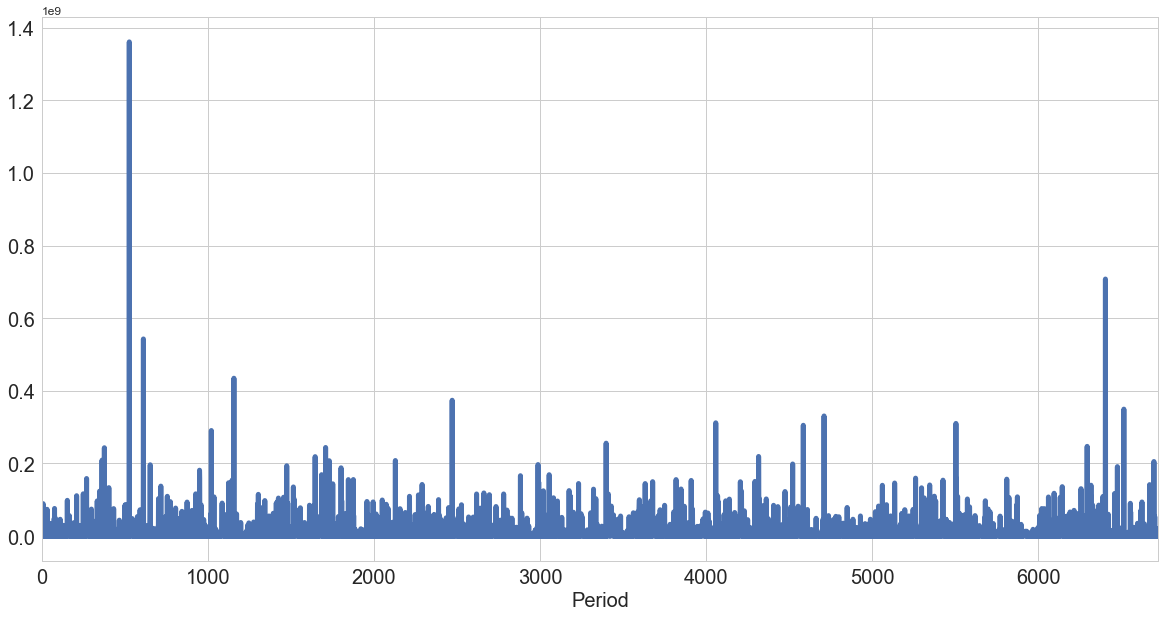

In [907]:
data['ELBTU'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Period', fontsize=20);
plt.show()

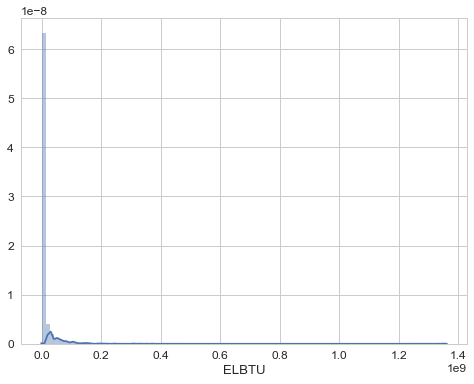

In [908]:
fig, ax = plt.subplots(figsize=[8,6])
#ax.set_xlim(0,80000)
sns.distplot(data['ELBTU'],ax=ax, bins=100)
plt.savefig('ELBTU_dist.png',bbox_inches='tight')

The target variable is not normally distributed, so transformation is neccessary for better reading.

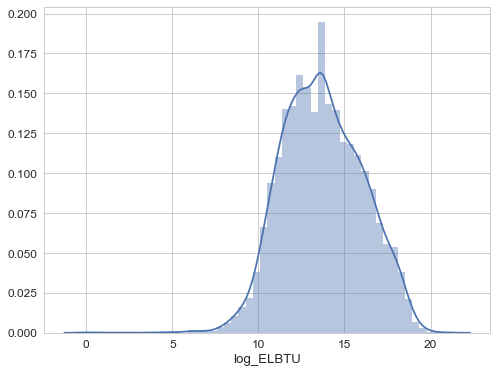

In [909]:
#Let's make a log transfer
data['log_ELBTU'] = data['ELBTU'].map(np.log1p)
#Log plot
fig, ax = plt.subplots(figsize=[8,6])
#ax.set_xlim(0,80000)
X_plot=sns.distplot(data['log_ELBTU'],ax=ax)

In [910]:
data['log_ELBTU'].describe()

count    6720.000000
mean       13.713246
std         2.331713
min         0.000000
25%        12.012781
50%        13.619918
75%        15.419761
max        21.031189
Name: log_ELBTU, dtype: float64

# Handling outliers

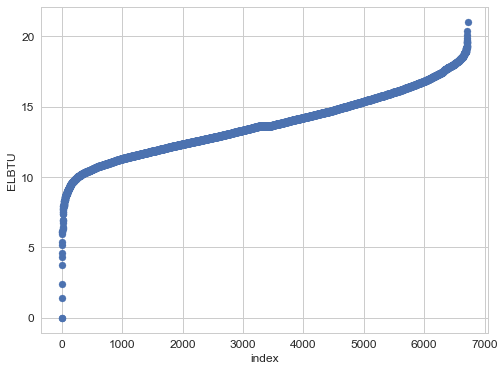

In [911]:
#Let's check outliers on the scatter plot for the target variable
plt.figure(figsize=(8,6))
plt.scatter(range(data.shape[0]), np.sort(data.log_ELBTU.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('ELBTU', fontsize=12)
plt.show()

Some outliers were detected on first index values and the last.

In [912]:
from sklearn.utils import resample

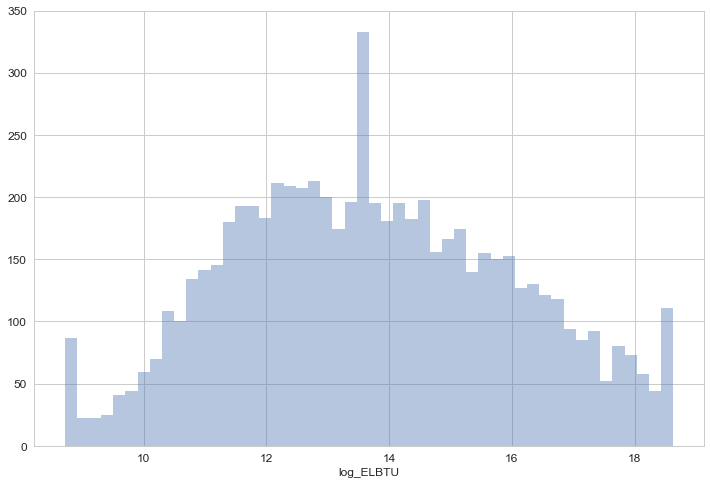

In [913]:
#Let's remove the outliers and get a histogram 
ulimit = np.percentile(data.log_ELBTU.values, 99)
llimit = np.percentile(data.log_ELBTU.values, 1)
data['log_ELBTU'].ix[data['log_ELBTU']>ulimit] = ulimit
data['log_ELBTU'].ix[data['log_ELBTU']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(data.log_ELBTU.values, bins=50, kde=False)
plt.xlabel('log_ELBTU', fontsize=12)
plt.show()

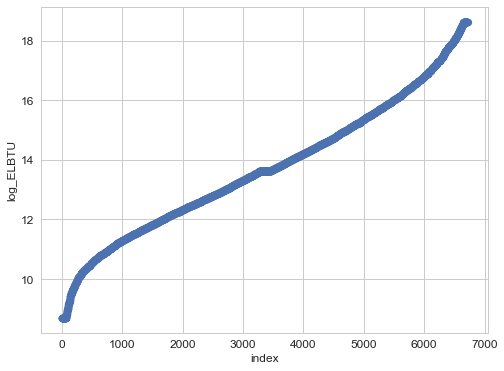

In [914]:
#Check if any outliers left from the same scatter plots
plt.figure(figsize=(8,6))
plt.scatter(range(data.shape[0]), np.sort(data.log_ELBTU.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('log_ELBTU', fontsize=12)
plt.show()

# Drop unneccessary columns for prediction

In [915]:
whatis('ZELCNS')

ZELCNS = Imputed electricity consumption


In [916]:
data.rename(columns=lambda x: x.replace('ZELCNS', 'ELCNS_Z'), inplace=True)

In [917]:
unwantedZ = data.columns[data.columns.str.startswith('Z')]
unwantedF = data.columns[data.columns.str.startswith('FINAL')]

 FINALWT is the number of buildings in the population that the
observation represents. For example, if FINALWT for a building is 1,000, that building represents itself
and 999 other non-sampled buildings. 

In [918]:
#Then, drop columns starting with 'FINAL'
data.drop(unwantedF, axis=1, inplace=True)

In [919]:
#Then, drop columns starting with 'Z'
data.drop(unwantedZ, axis=1, inplace=True)

'Z',the imputation flag provides information on the source of the data for the corresponding non-Z variable. All columns starting with 'Z' deleted, except 'ZELCNS' which one renamed as 'ELCNS_Z'.  

In [920]:
data.shape

(6720, 206)

# More data visualizations

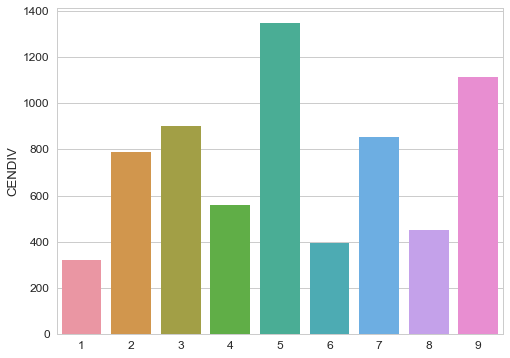

In [921]:
# Explore energy consumption of commercial building in different census division(CENDIV)
fig, ax = plt.subplots(figsize=[8,6])
sns.barplot(data['CENDIV'].value_counts().index,y=data['CENDIV'].value_counts())

'1' = 'New England'
'2' = 'Middle Atlantic'
'3' = 'East North Central'
'4' = 'West North Central'
'5' = 'South Atlantic' has the highest enegy consumption in commecial buildings.
'6' = 'East South Central'
'7' = 'West South Central'
'8' = 'Mountain'
'9' = 'Pacific'

In [922]:
whatis('PBAPLUS')

PBAPLUS = More specific building activity


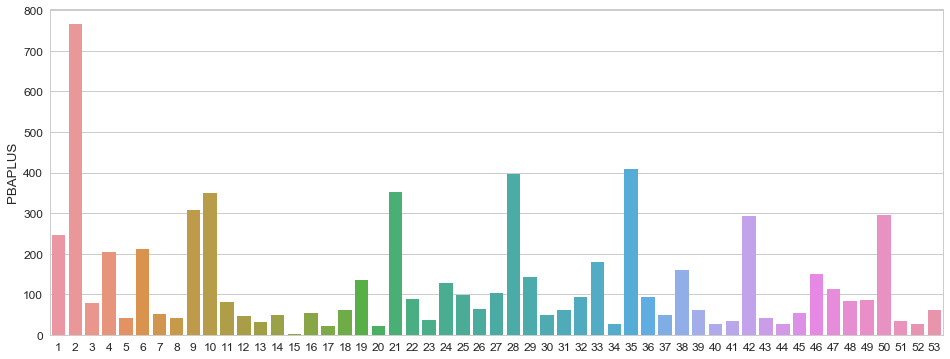

In [923]:
#Explore energy consumption of commercial building in different census division(CENDIV)
fig, ax = plt.subplots(figsize=[16,6])
sns.barplot(data['PBAPLUS'].value_counts().index,y=data['PBAPLUS'].value_counts())

'2'represents administrative/ professionel office where having large numbers of building under this category.

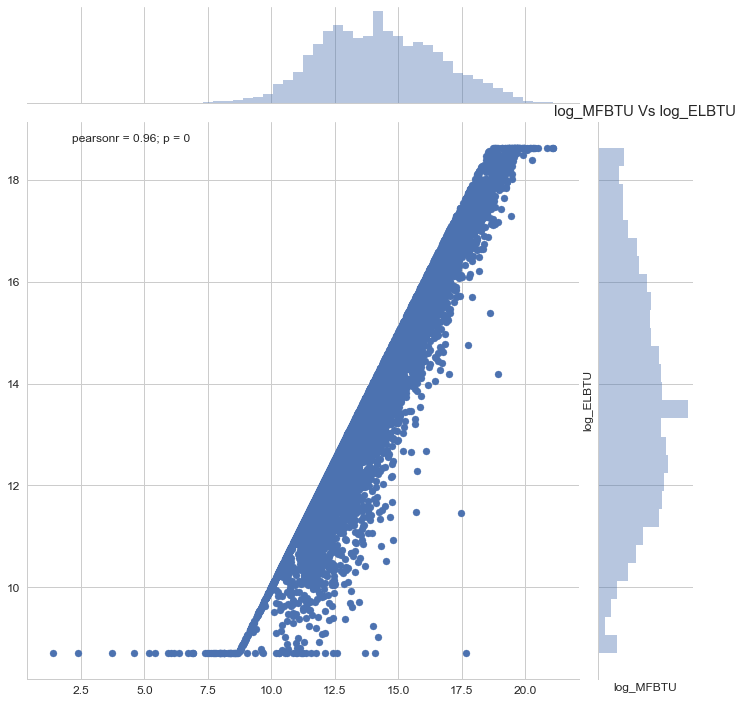

In [924]:
#MFBTU(Major Fuel Consumption)
data.log_MFBTU = data['MFBTU'].map(np.log1p) 
ulimit = np.percentile(data[col].values, 99.5)
llimit = np.percentile(data[col].values, 0.5)
data[col].ix[data[col]>ulimit] = ulimit
data[col].ix[data[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=data.log_MFBTU.values, y=data.log_ELBTU.values, size=10)
plt.ylabel('log_ELBTU', fontsize=12)
plt.xlabel('log_MFBTU', fontsize=12)
plt.title("log_MFBTU Vs log_ELBTU", fontsize=15)
plt.show()

There is a positive linear relationship between MFBTU and our target variable.

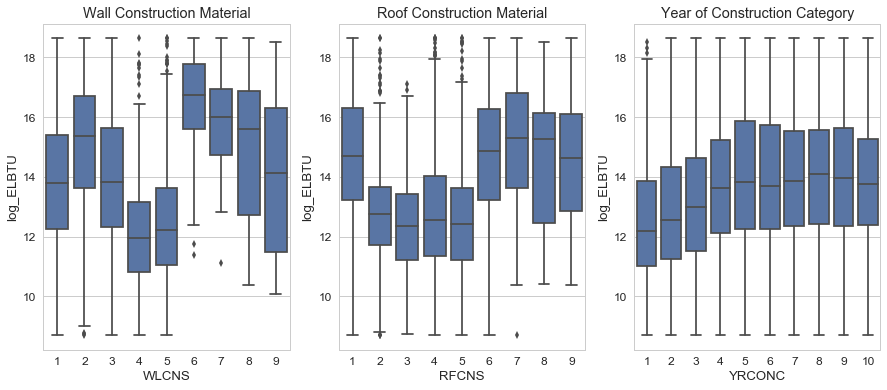

In [925]:
#Looking at some categorical features
fig, axarr = plt.subplots(1,3,figsize=[15,6])
axarr[0].set_title('Wall Construction Material')
axarr[1].set_title('Roof Construction Material')
axarr[2].set_title('Year of Construction Category')
b1 = sns.boxplot(ax=axarr[0],data=data,x='WLCNS',y='log_ELBTU',color=sns.color_palette()[0])
b2 = sns.boxplot(ax=axarr[1],data=data,x='RFCNS',y='log_ELBTU',color=sns.color_palette()[0])
b3=sns.boxplot(ax=axarr[2], data=data,x='YRCONC', y='log_ELBTU', color=sns.color_palette()[0])
#b1.set_xticklabels(['Very-cold/Cold','Hot-dry/Mixed-dry','Hot-humid','Mixed-humid','Marine'],rotation=30)
#b2.set_xticklabels(['Built-up (tar, felts, or fiberglass and a ballast, such as stone)','Slate or tile shingles','Wood shingles, shakes, or other wooden materials',
#'Asphalt, fiberglass, or other shingles','Metal surfacing','Plastic, rubber, or synthetic sheeting (single or multiple ply)','Concrete','No one major type','Other'])
#b3.set_xticklabels(['Before 1920','1920 to 1945','1946 to 1959','1960 to 1969','1970 to 1979','1980 to 1989','1990 to 1999','2000 to 2003','2004 to 2007', '2008 to 2012'"])
#axarr[0].set_xlabel(''); axarr[1].set_xlabel('')

plt.savefig('climate_insul_box.png',bbox_inches='tight')

SQFTC = Square footage category


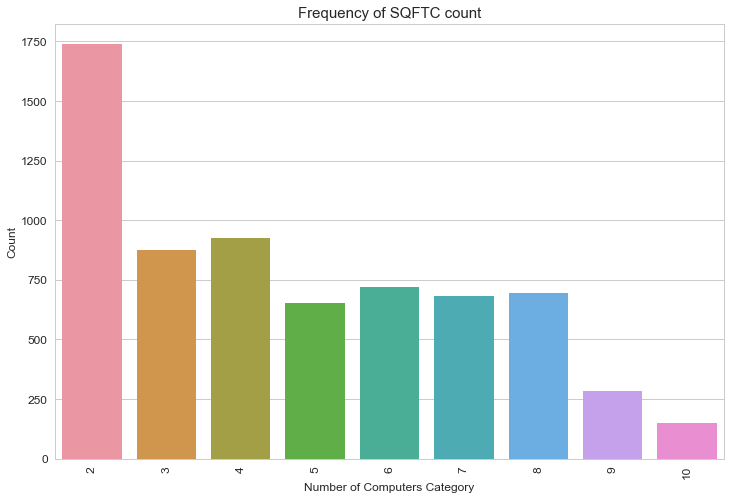

In [926]:
whatis('SQFTC')
plt.figure(figsize=(12,8))
sns.countplot(x="SQFTC", data=data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of Computers Category', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of SQFTC count", fontsize=15)
plt.show()

Commercial buildings having 1000 to 5000 sqft area have the highest frequency count among other categories of SQFTC.

PCTRMC = Number of computers category


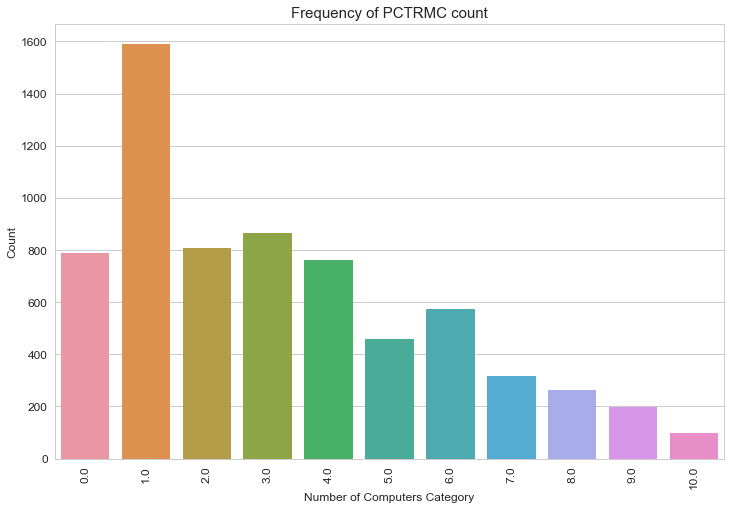

In [927]:
whatis('PCTRMC')
plt.figure(figsize=(12,8))
sns.countplot(x="PCTRMC", data=data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Number of Computers Category', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of PCTRMC count", fontsize=15)
plt.show()

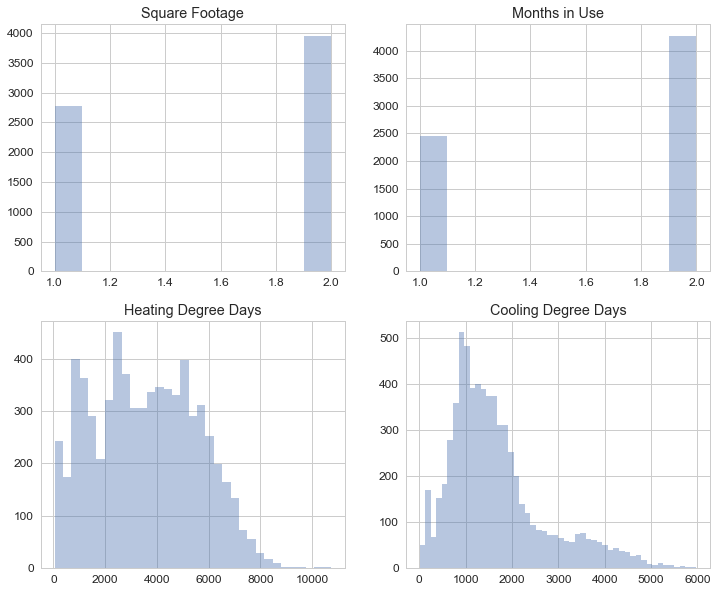

In [928]:
fig, axarr = plt.subplots(2,2,figsize=[12,10])
col = ['RFGVEN','EMCS','HDD65','CDD65']
title = ['Square Footage','Months in Use','Heating Degree Days','Cooling Degree Days']
for i in range(4):
    axarr.flatten()[i].set_title(title[i])
    sns.distplot(data[col[i]],ax=axarr.flatten()[i],kde=False)
    axarr.flatten()[i].set_xlabel('')

plt.savefig('features_dist.png',bbox_inches='tight')

# Correlation coefficient between the target and predictive variables

In [929]:
# Now let us look at the correlation coefficient of each of these variables 
x_cols = [col for col in data.columns if col not in ['log_ELBTU']  if data[col].dtype=='float64' or data[col].dtype=='int64' ]

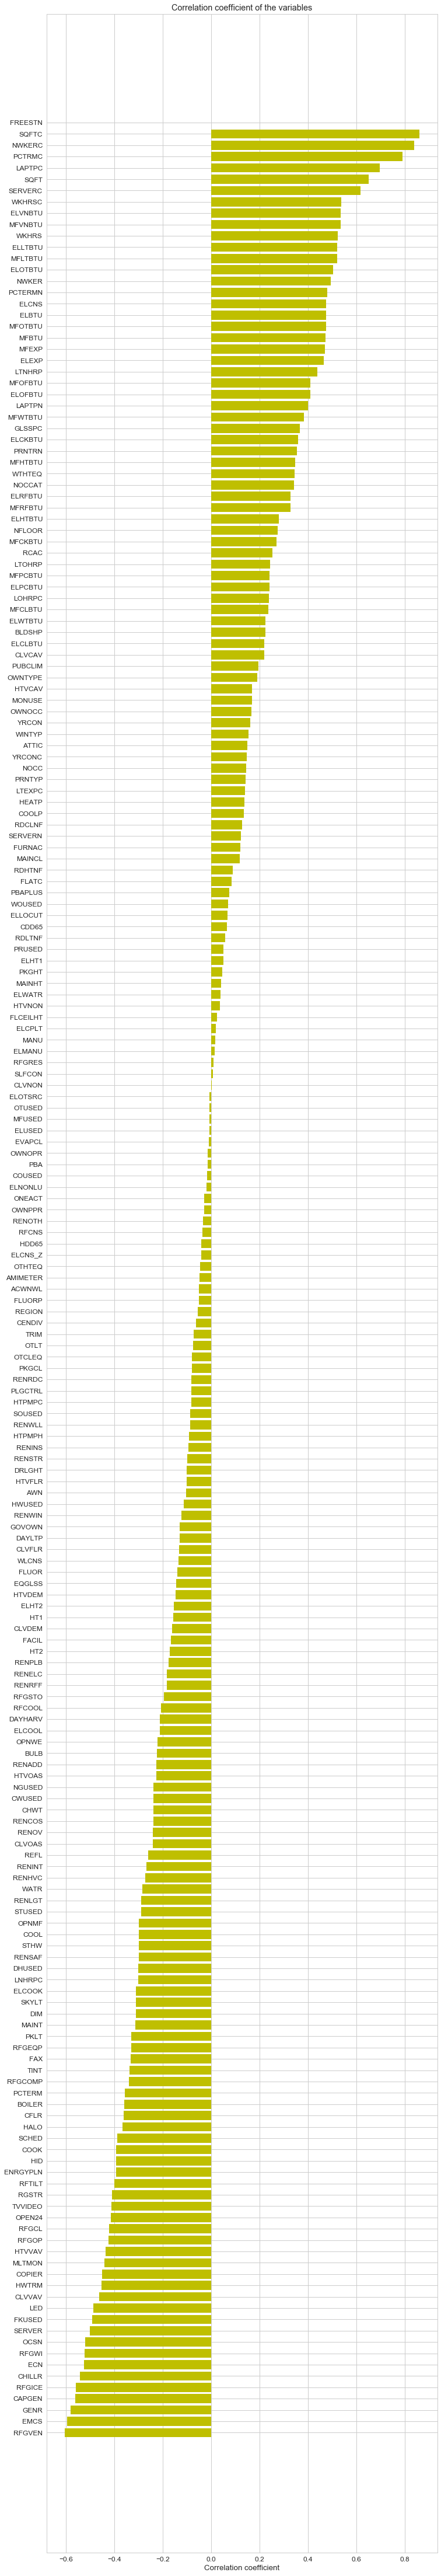

In [930]:
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(data[col].values, data.log_ELBTU.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,80))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [931]:
#List of variables having coefficient values larger than .5 with the target variable.
corr_df_sel = corr_df.ix[(corr_df['corr_values'] > 0.499) | (corr_df['corr_values'] <  -0.499)]
corr_df_sel.sort_values

<bound method DataFrame.sort_values of     col_labels  corr_values
127     RFGVEN    -0.606173
105       EMCS    -0.596203
59        GENR    -0.580573
58      CAPGEN    -0.561938
128     RFGICE    -0.558531
92      CHILLR    -0.543506
108        ECN    -0.525941
124      RFGWI    -0.523076
160       OCSN    -0.520745
139     SERVER    -0.501285
203    ELOTBTU     0.503241
188    MFLTBTU     0.521626
198    ELLTBTU     0.521626
48       WKHRS     0.522381
186    MFVNBTU     0.536443
196    ELVNBTU     0.536443
49      WKHRSC     0.537206
141    SERVERC     0.618111
4         SQFT     0.652312
136     LAPTPC     0.698010
132     PCTRMC     0.791279
51      NWKERC     0.840346
5        SQFTC     0.861569>

In [932]:
# Top 10 building under the group of 'log_ELBTU', 'SQFTC'.
data.groupby(['SQFTC','log_ELBTU']).size().sort_values(ascending=False).head(10)

SQFTC  log_ELBTU
2      13.619918    95
10     18.631059    53
2      8.707595     46
3      13.619918    27
4      13.619918    21
3      8.707595     13
9      18.631059    11
6      13.619918     7
5      13.619918     7
4      8.707595      6
dtype: int64

In [933]:
#get column index from column "YRCON"
data.columns.get_loc("YRCON")

16

In [934]:
#Build new data frame without '995' values in year of construction category
datam=data.ix[data.iloc[:, 16] > 995] 


In [935]:
datam.shape

(5889, 206)

In [937]:
whatis('YRCON')

YRCON = Year of construction


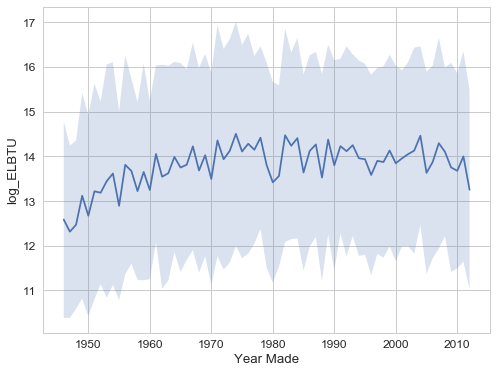

In [938]:
#See Annual electricity consumption by 'YRCON' of commercial buildings
mean = datam.groupby('YRCON')['log_ELBTU'].mean()
std = datam.groupby('YRCON')['log_ELBTU'].std()
fig, ax = plt.subplots(figsize=[8,6])
ax.set(xlabel='Year Made',ylabel='log_ELBTU')
ax.plot(mean)
ax.fill_between(mean.index,mean-std,mean+std,alpha=0.2)

plt.savefig('yearmade_timeseries.png',bbox_inches='tight')

# Pre-Processing of data modeling- Feature Importance

We had an understanding of important variables from the univariate analysis. But this is on a stand alone basis and also we have linearity assumption. Now let us build a non-linear model to get the important variables by building Extra Trees model.

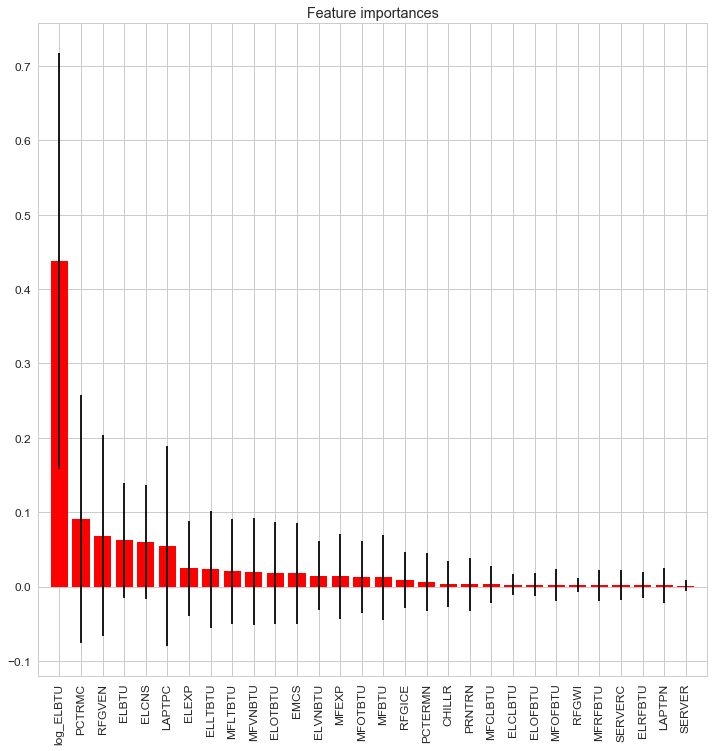

In [939]:
y = data['log_ELBTU'].values
X = data.drop([('log_ELBTU')], axis=1)
y=y.astype('float')
X=X.astype('float')
cat_cols =[col for col in data.columns if col not in ['log_ELBTU'] if data[col].dtype=='int64']
data = data.drop(['YRCON'] + cat_cols, axis=1)
feat_names = data.columns.values

from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=600, max_depth=30, max_features=0.7, n_jobs=-1, random_state=0)
model.fit(data, y)

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:30]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()


In [940]:
#X = datam.drop([('log_ELBTU'),('ELBTU')], axis=1)
data =pd.DataFrame(data, columns=['log_ELBTU','PCTRMC','RFGVEN','ELCNS','LAPTPC', 'ELEXP','MFEXP','ELVNBTU','ELOTBTU','EMCS','MFVNBTU','ELLTBTU',
                               'MFLTBTU','MFBTU','RFGICE','MFOTBTU'], dtype=float)
data.apply(lambda col: col.drop_duplicates().reset_index(drop=True))
data.head(2)

,log_ELBTU,PCTRMC,RFGVEN,ELCNS,LAPTPC,ELEXP,MFEXP,ELVNBTU,ELOTBTU,EMCS,MFVNBTU,ELLTBTU,MFLTBTU,MFBTU,RFGICE,MFOTBTU
PUBID,,,,,,,,,,,,,,,,
1,9.940253,1.0,2.0,6081.0,0.0,741.0,892.0,371.0,3928.0,2.0,371.0,7259.0,7259.0,26934.0,2.0,10114.0
2,15.501497,4.0,2.0,1581997.0,2.0,168712.0,173448.0,1356496.0,807929.0,1.0,1356496.0,989247.0,989247.0,5889672.0,1.0,807929.0


In [941]:
y = data['log_ELBTU'].values
X = data.drop([('log_ELBTU')], axis=1)
y=y.astype('int')
X=X.astype('int')

# PCA + Data Modeling

In [942]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

The goal of the PCA is to come up with optimal weights. “Optimal” means we’re capturing as much information in the original variables as possible, based on the correlations among those variables.

# Splitting Data into Training and Test Sets

In [943]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [944]:
print(X_train.shape)

(5376, 15)


In [945]:
print(X_test.shape)

(1344, 15)


In [946]:
print(y_train.shape)

(5376,)


In [947]:
y_test.shape

(1344,)

# Standardizing the Data

In [948]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA Application

In [949]:
from sklearn.decomposition import PCA

In [950]:
pca = PCA(.95)

In [951]:
#Fit PCA on training set
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [952]:
pca.n_components_

7

In [953]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [954]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [955]:
predictions = lm.predict(X_test)
print(predictions)

[ 11.47444353  11.26429217  12.86716413 ...,  11.70969234  11.2645541
  11.4850988 ]


In [956]:
lm.score(X_test,y_test)

0.71338493433384509

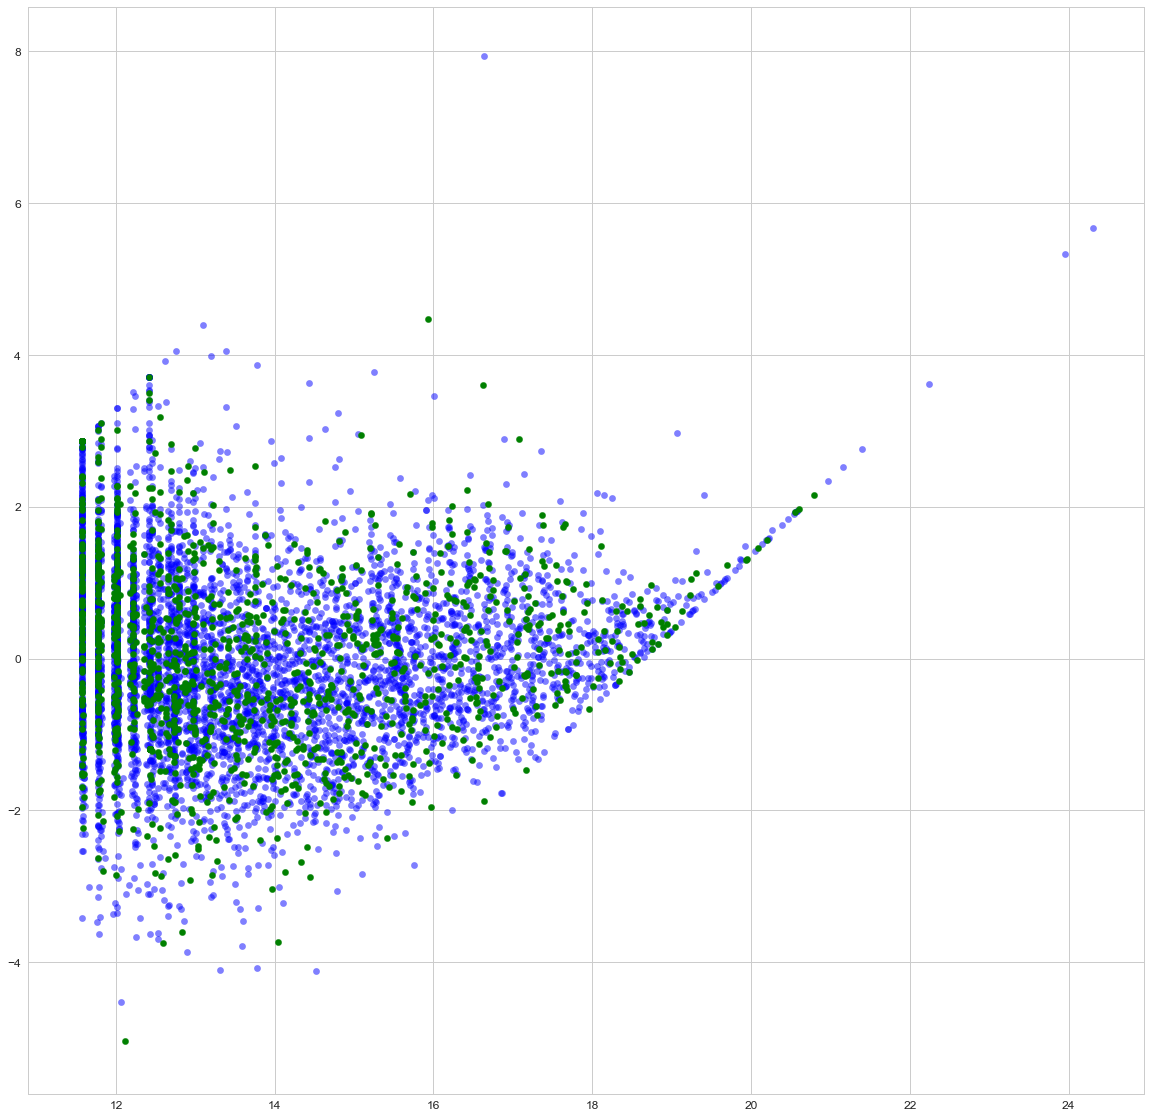

In [656]:
from sklearn import linear_model
from sklearn import metrics

lin = linear_model.LinearRegression()

lin.fit(X_train, y_train)
y_train_predict = lin.predict(X_train)
y_test_predict = lin.predict(X_test)

plt.figure(figsize=(20, 20))
plt.scatter(y_train_predict, y_train_predict - y_train, c='b', s=40, alpha=0.5)
plt.scatter(y_test_predict, y_test_predict - y_test, c = 'g', s=40)


# Neural Network Model

In [957]:

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [958]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [959]:
predictions = mlp.predict(X_test)
print(predictions)

[12 11 13 ..., 11 10 13]


In [960]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[  0   0  12   5   0   0   0   0   0   0   0]
 [  0   0  19  11   0   0   0   0   0   0   0]
 [  0   0  26  76   2   0   0   0   0   0   0]
 [  0   0   0 136  39   0   0   0   0   0   0]
 [  0   0   0  18 155  19   0   0   0   0   0]
 [  0   0   0   0  20 179  26   0   0   0   0]
 [  0   0   0   0   0  14 147  18   0   0   0]
 [  0   0   0   0   0   0  19 140  10   0   0]
 [  0   0   0   0   0   0   0  23  97   7   0]
 [  0   0   0   0   0   0   0   0   7  64   6]
 [  0   0   0   0   0   0   0   0   0   6  43]]


In [961]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          8       0.00      0.00      0.00        17
          9       0.00      0.00      0.00        30
         10       0.46      0.25      0.32       104
         11       0.55      0.78      0.65       175
         12       0.72      0.81      0.76       192
         13       0.84      0.80      0.82       225
         14       0.77      0.82      0.79       179
         15       0.77      0.83      0.80       169
         16       0.85      0.76      0.80       127
         17       0.83      0.83      0.83        77
         18       0.88      0.88      0.88        49

avg / total       0.71      0.73      0.72      1344



In [962]:
mlp.score(X_test, y_test)

0.734375

# Random Forest Model

In [963]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [964]:
#CV 
n_features = X_train.shape[1]
params = {'max_features': np.linspace(math.sqrt(n_features),n_features,num=10,dtype='int'),
         'min_samples_leaf': range(1,20,5),
         'max_depth':range(2,7)}
clf = RandomForestRegressor(n_estimators=15)
CV = GridSearchCV(clf, param_grid=params)
CV.fit(X_train,y_train)
CV.best_params_

{'max_depth': 6, 'max_features': 7, 'min_samples_leaf': 6}

In [965]:
clf = RandomForestRegressor(max_features=CV.best_params_['max_features'],
                           min_samples_leaf=CV.best_params_['min_samples_leaf'])
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=6,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [966]:
print clf.score(X_train,y_train)
print clf.score(X_test,y_test)

0.972972053091
0.958654936765


In [967]:
scores = []
for n in xrange(1,30,4):
    clf = RandomForestRegressor(n_estimators=n,
        max_features=CV.best_params_['max_features'],
        min_samples_leaf=CV.best_params_['min_samples_leaf'])
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))

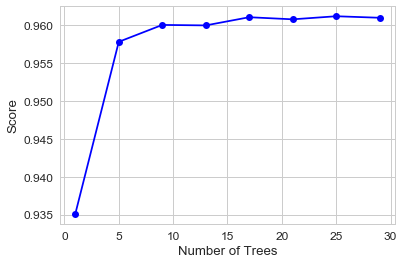

In [968]:
fig, ax = plt.subplots()
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Score')
plt.plot(xrange(1,30,4),scores,'bo-')

In [969]:
print 'Train set r^2:', clf.score(X_train,y_train)
print 'Test set r^2:', clf.score(X_test,y_test)

Train set r^2: 0.974611800183
Test set r^2: 0.961007354822
